In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("C:/Users/samsung/Downloads/archive (4)/queue_data.csv")
df.head()

,arrival_time,start_time,finish_time,wait_time,queue_length
0,30-03-2023 0.10,30-03-2023 0.10,2023-03-30 00:22:44.800000000,12.68,28
1,30-03-2023 0.10,30-03-2023 0.16,2023-03-30 00:25:53.200000000,9.82,28
2,30-03-2023 0.10,30-03-2023 0.16,2023-03-30 00:25:48.400000000,9.74,28
3,30-03-2023 0.10,30-03-2023 0.14,2023-03-30 00:27:23.200000000,13.32,28
4,30-03-2023 0.10,30-03-2023 0.15,2023-03-30 00:31:21.400000000,16.29,28


In [3]:
df.columns

Index(['arrival_time', 'start_time', 'finish_time', 'wait_time',
       'queue_length'],
      dtype='object')

In [4]:
df.shape

(560, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   arrival_time  560 non-null    object 
 1   start_time    560 non-null    object 
 2   finish_time   560 non-null    object 
 3   wait_time     560 non-null    float64
 4   queue_length  560 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 22.0+ KB


In [6]:
df.describe()

,wait_time,queue_length
count,560.000000,560.000000
mean,10.107911,32.132143
std,5.032406,12.418048
min,-2.930000,2.000000
25%,6.527500,24.750000
50%,10.120000,30.000000
75%,13.322500,45.000000
max,26.980000,50.000000


In [7]:
df.isnull().sum()

arrival_time    0
start_time      0
finish_time     0
wait_time       0
queue_length    0
dtype: int64

In [8]:
df = df.dropna()


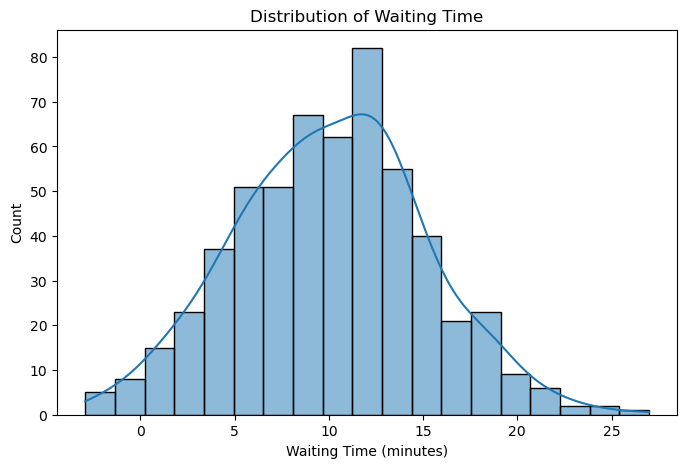

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["wait_time"], kde=True)
plt.title("Distribution of Waiting Time")
plt.xlabel("Waiting Time (minutes)")
plt.show()


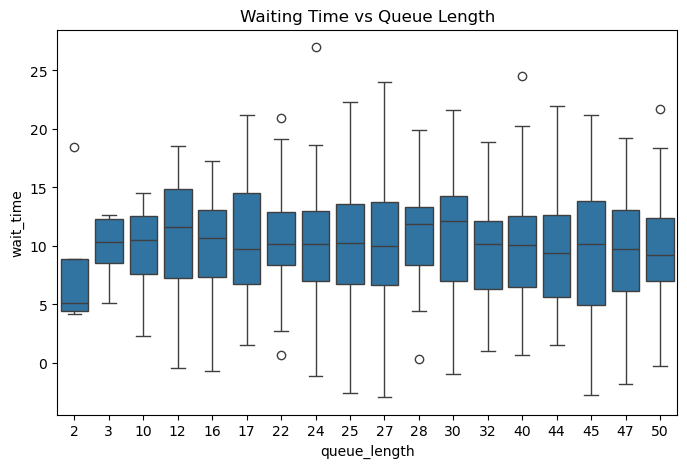

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x="queue_length", y="wait_time", data=df)
plt.title("Waiting Time vs Queue Length")
plt.show()

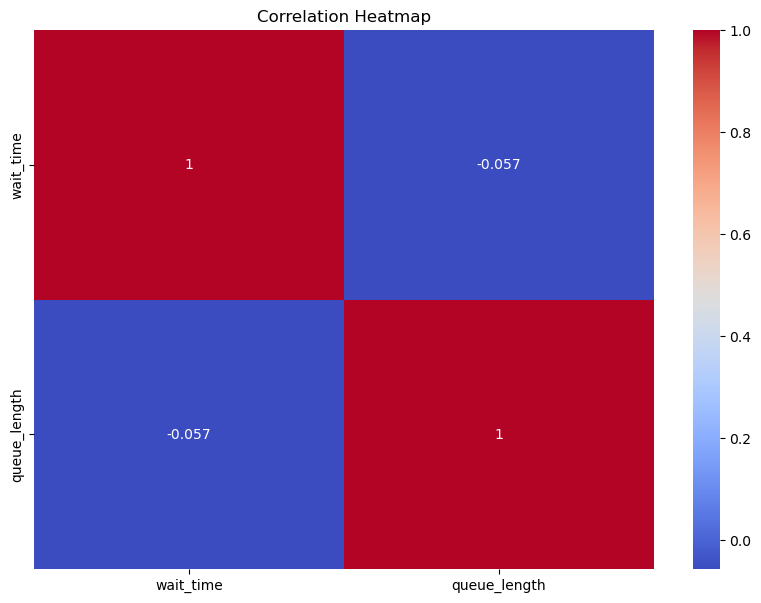

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [12]:
le = LabelEncoder()

for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

In [13]:
X = df.drop("wait_time", axis=1)
y = df["wait_time"]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [31]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf.shape

(112,)

In [17]:
def evaluate_model(name, y_test, y_pred):
    print(f"--- {name} ---")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))
    print()


In [18]:
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)


--- Linear Regression ---
MAE: 3.9950953993227674
RMSE: 5.147517706829251
R2 Score: -0.04709004136694528

--- Random Forest ---
MAE: 1.9721616071428574
RMSE: 2.8585210001196426
R2 Score: 0.6770977249379606



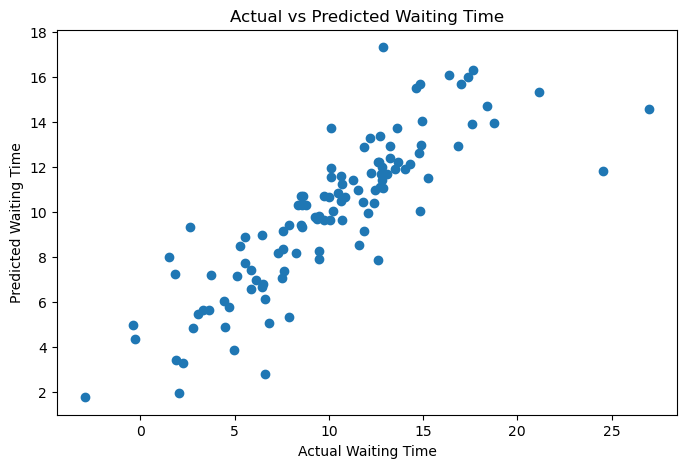

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Waiting Time")
plt.ylabel("Predicted Waiting Time")
plt.title("Actual vs Predicted Waiting Time")
plt.show()


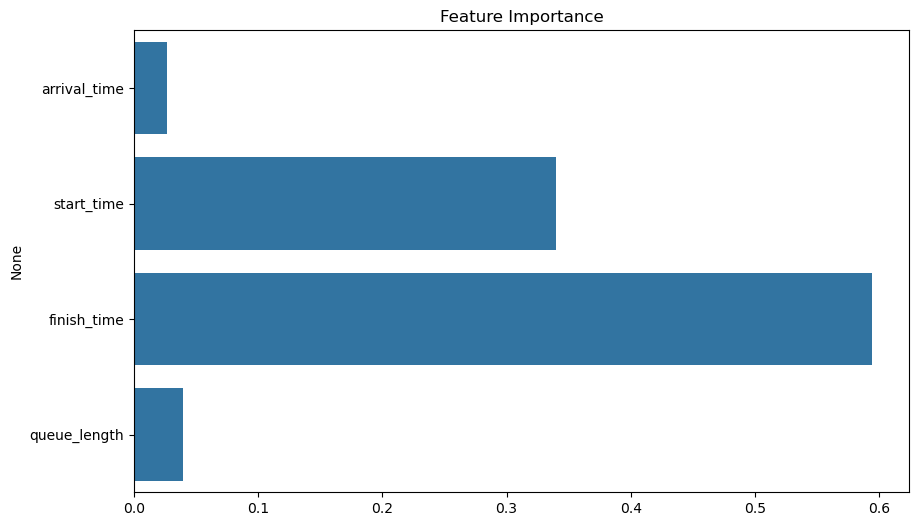

In [20]:
importance = rf.feature_importances_

plt.figure(figsize=(10,6))
sns.barplot(x=importance, y=X.columns)
plt.title("Feature Importance")
plt.show()


In [21]:
sample = X_test.iloc[[0]]
predicted = rf.predict(sample)

print("Predicted Waiting Time (minutes):", round(predicted[0], 2))


Predicted Waiting Time (minutes): 11.69


In [23]:
y_pred = rf.predict(X_test)
pd.DataFrame({
    "Actual Waiting Time": y_test.values,
    "Predicted Waiting Time": y_pred
})


,Actual Waiting Time,Predicted Waiting Time
0,13.06,11.6946
1,13.64,13.7284
2,26.98,14.5716
3,10.62,11.6140
4,8.37,10.3065
...,...,...
107,2.78,4.8355
108,12.20,13.3105
109,11.83,10.4449
110,12.74,11.7071
